In [6]:
from pororo import Pororo
import json

In [7]:
se = Pororo(task="sentence_embedding", lang="ko")

In [8]:
# define file path
train_file = '../../data/step1_train.json' 
validation_file = '../../data/step1_valid.json'
model_name_or_path = '../../data/models/electra'

In [9]:
with open(train_file, 'r', encoding = 'UTF-8') as fp:
    train_data = json.load(fp)

In [10]:
# create list of category, T/F label, news contents
label_lst= []
cat_lst = []
cont_lst = []
for i in range(len(train_data['input_data'])):
    label_lst.append(train_data['input_data'][i]['label'])
    cat_lst.append(train_data['input_data'][i]['category'])
    cont_lst.append(train_data['input_data'][i]['content']) 

In [11]:
# produce word vectors using sent2vec model
cont_proc_lst = []
for i in cont_lst:
    cont_proc_lst.append(se(i))

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
import numpy as np

In [13]:
# create dataframe for visualisation
df_vis = pd.DataFrame()
le = preprocessing.LabelEncoder()
df_vis['label'] = le.fit_transform(label_lst)
df_vis['cat'] = le.fit_transform(cat_lst)

In [18]:
# show label values
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
dictionary

{'IT/과학': 0,
 '경제': 1,
 '대북정책 폄훼': 2,
 '대중의 관심 유도': 3,
 '로열패밀리 신변이상': 4,
 '사설': 5,
 '사회': 6,
 '생활/문화': 7,
 '정치': 8,
 '최고지도자 신변이상': 9,
 '최고지도자 측근(당·정·군 관료) 숙청': 10}

In [14]:
# dimensionality reduction using PCA 
pca = PCA(n_components=3)
pca_result = pca.fit_transform(cont_proc_lst)
df_vis['pca-one'] = pca_result[:,0]
df_vis['pca-two'] = pca_result[:,1] 
df_vis['pca-three'] = pca_result[:,2]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


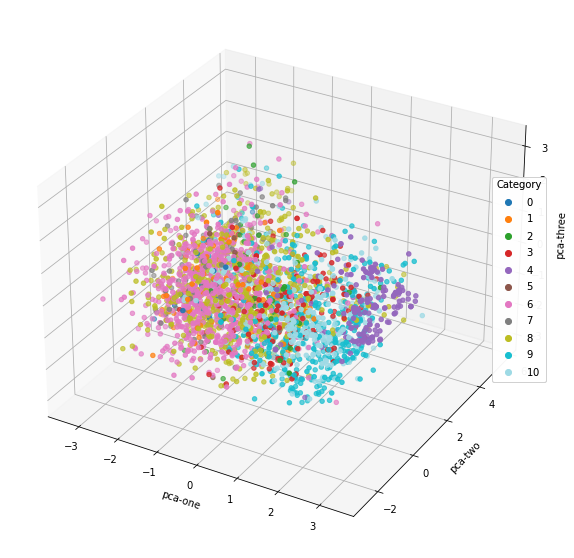

In [19]:
# visualisation using PCA 
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter = ax.scatter(
    xs=df_vis["pca-one"], 
    ys=df_vis["pca-two"], 
    zs=df_vis["pca-three"], 
    c=df_vis["cat"], 
    cmap='tab20'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="center right", title="Category")
ax.add_artist(legend1)

In [20]:
# diemsnionality reduction using t-SNE
tsne = TSNE(n_components=3,perplexity=40)
tsne_results = tsne.fit_transform(cont_proc_lst)

In [21]:
df_vis['tsne-one'] = tsne_results[:,0]
df_vis['tsne-two'] = tsne_results[:,1]
df_vis['tsne-three'] = tsne_results[:,2]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


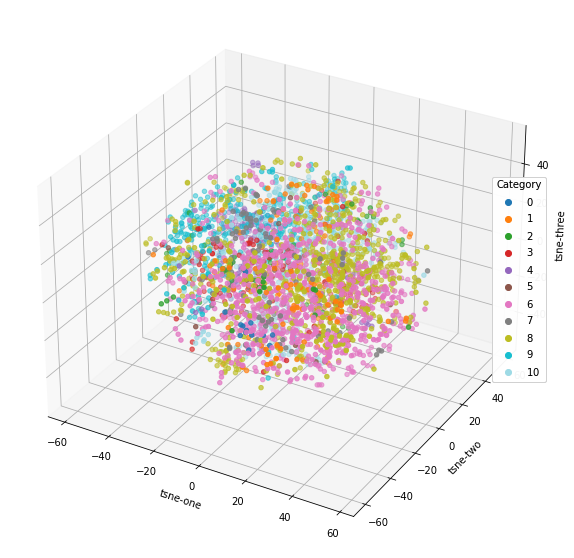

In [22]:
# visualisation using t-SNE
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter = ax.scatter(
    xs=df_vis["tsne-one"], 
    ys=df_vis["tsne-two"], 
    zs=df_vis["tsne-three"], 
    c=df_vis["cat"], 
    cmap='tab20'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="center right", title="Category")
ax.add_artist(legend1)

In [25]:
# first reduce dimension using pca and forward the results to t-SNE
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(cont_proc_lst)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
tsne = TSNE(n_components=3, perplexity=40)
tsne_pca_results = tsne.fit_transform(pca_result_50)
df_vis['tsne-pca50-one'] = tsne_pca_results[:,0]
df_vis['tsne-pca50-two'] = tsne_pca_results[:,1]
df_vis['tsne-pca50-three'] = tsne_pca_results[:,2]

Cumulative explained variation for 50 principal components: 0.7878712173528601


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  
No handles with labels found to put in legend.


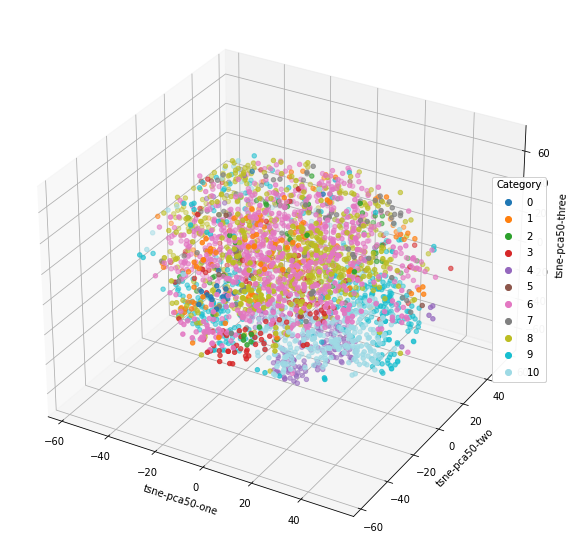

In [26]:
# visualisation using pca50 and t-SNE
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter = ax.scatter(
    xs=df_vis["tsne-pca50-one"], 
    ys=df_vis["tsne-pca50-two"], 
    zs=df_vis["tsne-pca50-three"], 
    c=df_vis["cat"], 
    cmap='tab20'
)
ax.set_xlabel('tsne-pca50-one')
ax.set_ylabel('tsne-pca50-two')
ax.set_zlabel('tsne-pca50-three')
ax.legend()
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="center right", title="Category")
ax.add_artist(legend1)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

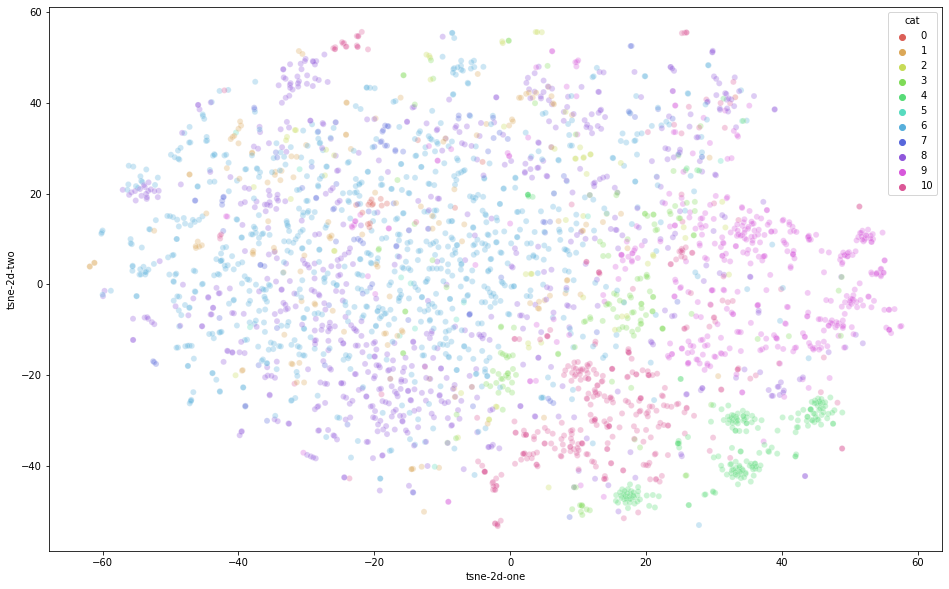

In [34]:
# 2D visualisation using t-SNE (category)
tsne = TSNE(n_components=2,perplexity=40)
tsne_results = tsne.fit_transform(cont_proc_lst)
df_vis['tsne-2d-one'] = tsne_results[:,0]
df_vis['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cat",
    palette=sns.color_palette("hls", 11),
    data=df_vis,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

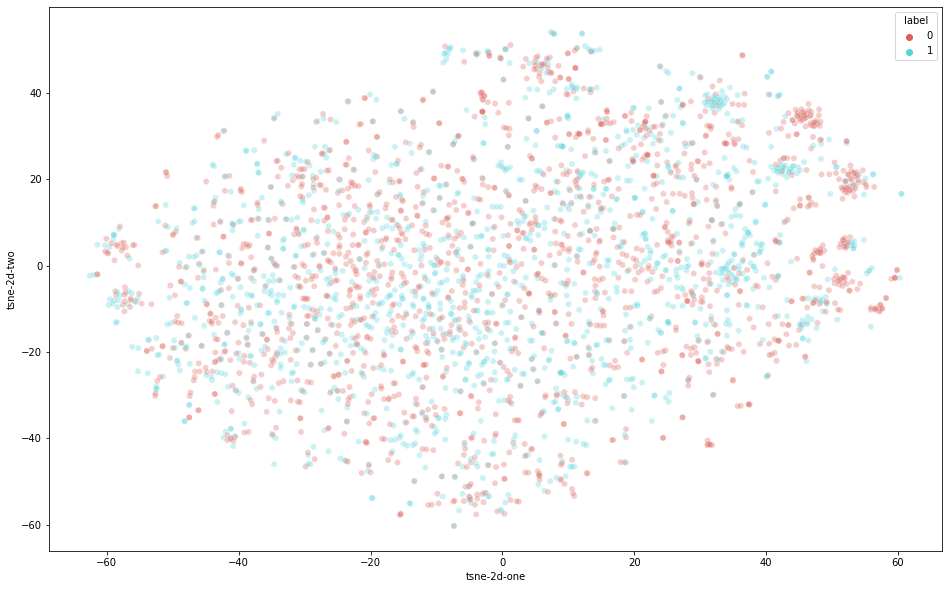

In [57]:
# 2D visualisation using t-SNE (True/False)
tsne = TSNE(n_components=2,perplexity=40)
tsne_results = tsne.fit_transform(cont_proc_lst)
df_vis['tsne-2d-one'] = tsne_results[:,0]
df_vis['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 2),
    data=df_vis,
    legend="full",
    alpha=0.3
)

In [28]:
# dimensionlaity reduction using UMAP
import umap
reducer = umap.UMAP(n_neighbors=15)
umap_results= reducer.fit_transform(cont_proc_lst)
df_vis['umap-one'] = umap_results[:,0]
df_vis['umap-two'] = umap_results[:,1]

In [29]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(cont_proc_lst)
reducer3d = umap.UMAP(n_components = 3, n_neighbors=15)
umap_results3d= reducer3d.fit_transform(pca_result_50)
df_vis['umap-one3d'] = umap_results3d[:,0]
df_vis['umap-two3d'] = umap_results3d[:,1]
df_vis['umap-three3d'] = umap_results3d[:,2]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  
No handles with labels found to put in legend.


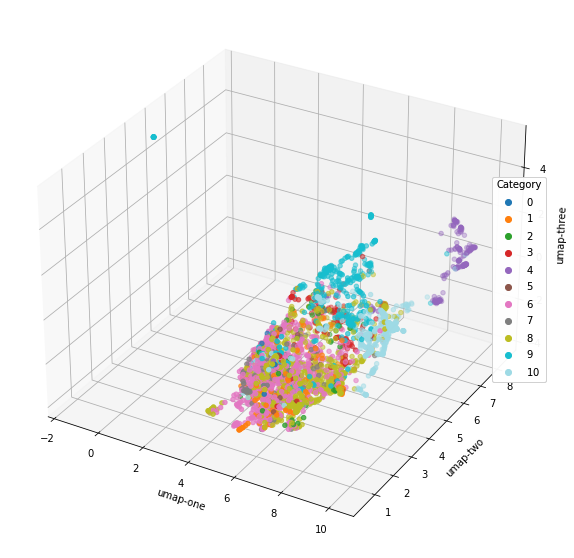

In [30]:
# visualisation using UMAP
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter = ax.scatter(
    xs=df_vis["umap-one3d"], 
    ys=df_vis["umap-two3d"], 
    zs=df_vis["umap-three3d"], 
    c=df_vis["cat"], 
    cmap='tab20'
)
ax.set_xlabel('umap-one')
ax.set_ylabel('umap-two')
ax.set_zlabel('umap-three')
ax.legend()
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="center right", title="Category")
ax.add_artist(legend1)

<AxesSubplot:xlabel='umap-one', ylabel='umap-two'>

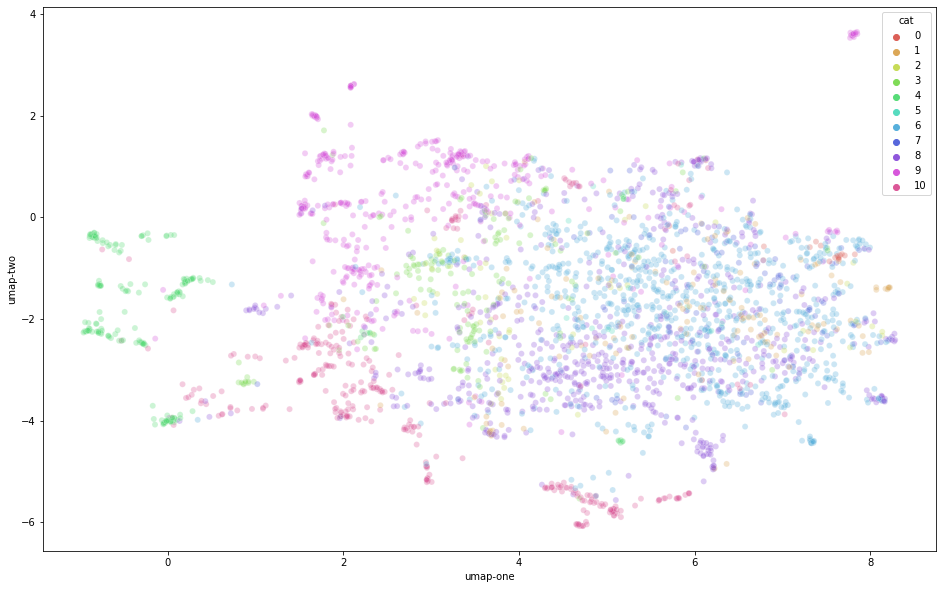

In [31]:
# 2d visualisation using UMAP
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-one", y="umap-two",
    hue="cat",
    palette=sns.color_palette("hls", 11),
    data=df_vis,
    legend="full",
    alpha=0.3
)

# centre of clusters

In [32]:
df_vis.columns

Index(['label', 'cat', 'pca-one', 'pca-two', 'pca-three', 'tsne-one',
       'tsne-two', 'tsne-three', 'tsne-pca50-one', 'tsne-pca50-two',
       'tsne-pca50-three', 'umap-one', 'umap-two', 'umap-one3d', 'umap-two3d',
       'umap-three3d'],
      dtype='object')

In [40]:
# fine the centre point of each category cluster
centroid=[[] for _ in range(11)]
for i in range(11):
    x = df_vis.loc[df_vis['cat'] == i]['tsne-2d-one'].sum()/len(df_vis.loc[df_vis['cat'] == i])
    y = df_vis.loc[df_vis['cat'] == i]['tsne-2d-two'].sum()/len(df_vis.loc[df_vis['cat'] == i])
    centroid[i].append(x)
    centroid[i].append(y)
df_cent = pd.DataFrame(centroid)
df_cent['cat_lab'] = [i for i in range(11)]

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

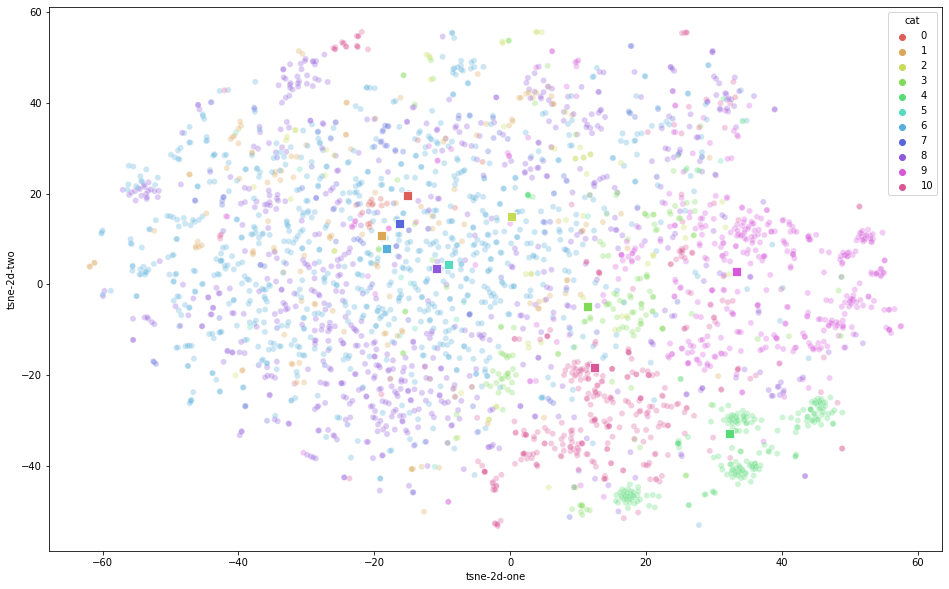

In [41]:
# plot with centre of each cluster

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cat",
    palette=sns.color_palette("hls", 11),
    data=df_vis,
    legend="full",
    alpha=0.3
)
sns.scatterplot(x = 0, y = 1,
                hue="cat_lab",
                palette=sns.color_palette("hls", 11),
                marker ='$\u25A0$',
                legend=False,
                 s= 100,
                data = df_cent)

<AxesSubplot:xlabel='0', ylabel='1'>

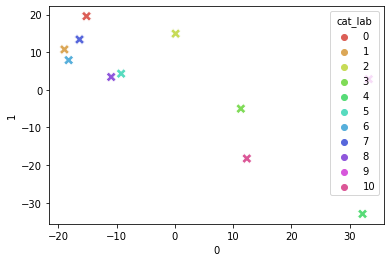

In [42]:
# centre only plot
sns.scatterplot(x = 0, y = 1,
                hue="cat_lab",
                palette=sns.color_palette("hls", 11),
                marker ='X',
                s= 100,
                data = df_cent)

In [113]:
mean_dist = [[] for _ in range(11)]
import numpy as np
for cp, i in zip(centroid, range(11)):
    
    for j in range(11):
        if j == i:
            pass
        else: 
            x = df_vis.loc[df_vis['cat']==j]['tsne-2d-one']
            y = df_vis.loc[df_vis['cat']==j]['tsne-2d-two']
            dist_save = []
            for x_val,y_val in zip(x,y):
                xy = [x_val,y_val]
                dist = np.linalg.norm(np.array(cp)-np.array(xy))
                dist_save.append(dist)
            avg_dist = sum(dist_save)/len(dist_save)
            mean_dist[i].append(avg_dist)